# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [99]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import io


In [100]:
url="https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records"
#
respuesta=requests.get(url)
print(respuesta.status_code)#nos da el codigo que entrega la pagina
print(respuesta.text)#el texto de la pagina


200
<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>List of Spotify streaming records - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-cont

In [101]:
import pandas as pd 
html=io.StringIO(respuesta.text)
tablas= pd.read_html(html)
print(f'numero de tablas: {len(tablas)}')

numero de tablas: 27


In [102]:
#si quiero ver la primera tabla se pone como una lista: tablas[0]
df=tablas[0]
df.head()# asi la tabla se ve mejor, mas clara 

,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,4.946,29 November 2019,[2]
1,2,"""Shape of You""",Ed Sheeran,4.473,6 January 2017,[3]
2,3,"""Starboy""",The Weeknd and Daft Punk,4.008,21 September 2016,[4]
3,4,"""Someone You Loved""",Lewis Capaldi,3.989,8 November 2018,[5]
4,5,"""As It Was""",Harry Styles,3.979,1 April 2022,[6]


In [103]:
#para borrar una columna hay que hacer drop(columns="la columna que quiero borrar",axis=1(si es colimna y 0 si es fila),inplace=True(no se que es inplace))
df.drop(columns="Ref.",axis=1,inplace=True)
df

,Rank,Song,Artist(s),Streams (billions),Release date
0,1,"""Blinding Lights""",The Weeknd,4.946,29 November 2019
1,2,"""Shape of You""",Ed Sheeran,4.473,6 January 2017
2,3,"""Starboy""",The Weeknd and Daft Punk,4.008,21 September 2016
3,4,"""Someone You Loved""",Lewis Capaldi,3.989,8 November 2018
4,5,"""As It Was""",Harry Styles,3.979,1 April 2022
...,...,...,...,...,...
96,97,"""Someone Like You""",Adele,2.355,24 January 2011
97,98,"""505""",Arctic Monkeys,2.345,27 April 2007
98,99,Numb,Linkin Park,2.345,25 March 2003
99,100,"""Too Good At Goodbyes""",Sam Smith,2.343,8 September 2017


In [104]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Rank                101 non-null    object
 1   Song                101 non-null    object
 2   Artist(s)           101 non-null    object
 3   Streams (billions)  101 non-null    object
 4   Release date        101 non-null    object
dtypes: object(5)
memory usage: 4.1+ KB


In [106]:
df.drop(df.tail(1).index,inplace=True)#forma de borrar la ultima fila
df["Streams (billions)"]=df["Streams (billions)"].astype(float)
df.info()
df["Release date"]=pd.to_datetime(df["Release date"],errors="coerce")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Rank                99 non-null     object        
 1   Song                99 non-null     object        
 2   Artist(s)           99 non-null     object        
 3   Streams (billions)  99 non-null     float64       
 4   Release date        99 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 4.0+ KB


In [111]:
df["Rank"]=df["Rank"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Rank                99 non-null     int64         
 1   Song                99 non-null     object        
 2   Artist(s)           99 non-null     object        
 3   Streams (billions)  99 non-null     float64       
 4   Release date        99 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 4.0+ KB


In [112]:
#conectar a sql (se crea la base de datos) ---> conexion=sqlite3.connect("tablas_de_mas_reproducidos.db")
conexion=sqlite3.connect("tablas_de_mas_reproducidos.db")
df.to_sql("mas_reproducidas",conexion,if_exists="replace",index=False)#se escribe la tabla

99

In [114]:
#para ir a la base de datos
cursor=conexion.cursor()
cursor.execute("SELECT COUNT(*) FROM mas_reproducidas")
print(cursor.fetchone()[0])
conexion.commit()
conexion.close


99


<function Connection.close()>

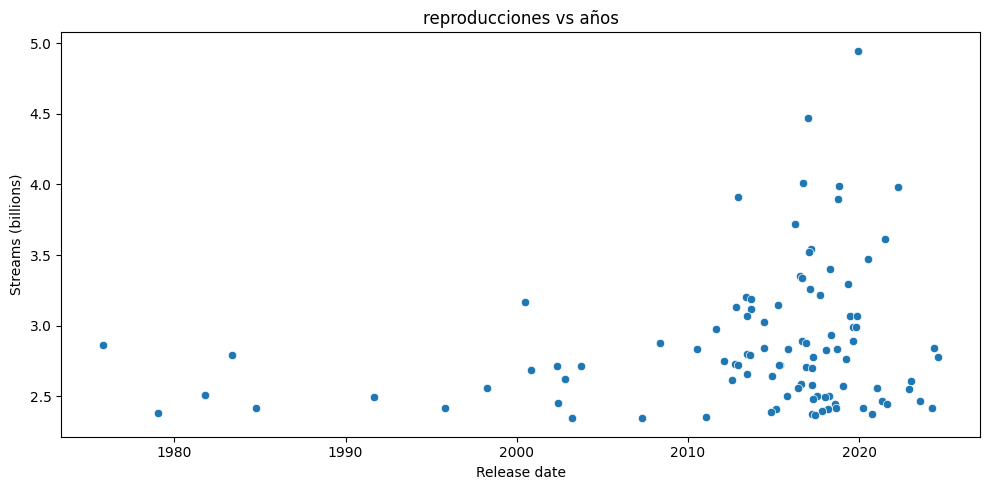

In [123]:
#graficando
#tamaño del grafico
plt.figure(figsize=(10,5))
grafica1=sns.scatterplot(df,x="Release date",y="Streams (billions)")
plt.title("reproducciones vs años")
plt.tight_layout()


Artist(s)
The Weeknd                         4
Ed Sheeran                         4
Bruno Mars                         4
Imagine Dragons                    3
Coldplay                           3
Arctic Monkeys                     3
Dua Lipa                           2
Harry Styles                       2
Billie Eilish                      2
Justin Bieber                      2
Shawn Mendes                       2
Olivia Rodrigo                     2
Linkin Park                        2
XXXTentacion                       2
Queen                              2
Eminem                             2
The Weeknd and Daft Punk           1
Lewis Capaldi                      1
The Kid Laroi and Justin Bieber    1
Drake with Wizkid and Kyla         1
Name: count, dtype: int64


<Axes: ylabel='Artist(s)'>

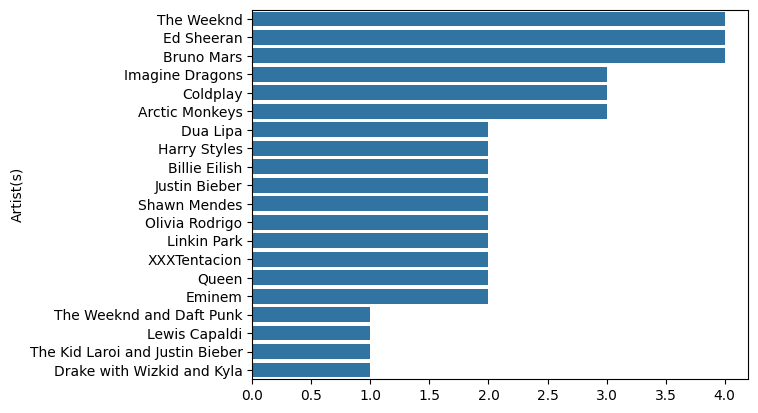

In [ ]:
#otro grafico, puede ser el n8umero de canciones que tiene cada artista en el ranking
n_canciones_x_artista=df["Artist(s)"].value_counts().nlargest(20)
print(n_canciones_x_artista)
plt.Figure(figsize=(10,5))
sns.barplot(x=n_canciones_x_artista.values,y=n_canciones_x_artista.index)


<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, A-ha to XXXTentacion
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist(s)           74 non-null     object 
 1   Streams (billions)  74 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None


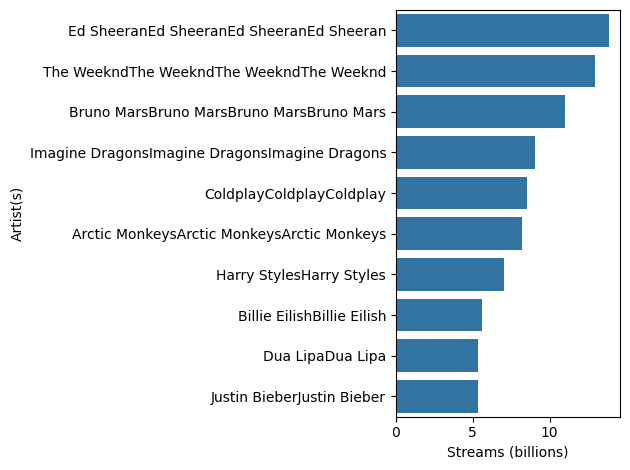

In [ ]:
#grafico de reproducciones por artista ordenado de mayor a menor
suma_repr_x_artista=df[["Artist(s)","Streams (billions)"]].groupby(df["Artist(s)"]).sum()
print(suma_repr_x_artista.info())
suma_repr_x_artista=suma_repr_x_artista.sort_values(by="Streams (billions)",ascending=False)

sns.barplot(y=suma_repr_x_artista["Artist(s)"].head(10),x=suma_repr_x_artista["Streams (billions)"].head(10))
plt.tight_layout()

<Axes: >

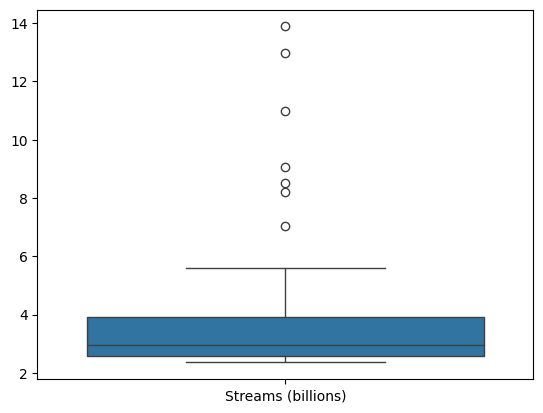

In [146]:
sns.boxplot(suma_repr_x_artista)